In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import seaborn as sns
import math

import folium

import subprocess

sns.set_style("darkgrid")

In [2]:
#prepare data for loading
mypath = "C:\Users\Bryan\Documents\GitHub\Springboard\Capstone Project\Data\\"
dataFiles = [f for f in listdir(mypath) if isfile(join(mypath,f))]
dataFrames = []

inputDtypeDict = {'tripduration': np.int64,
                  #'starttime': np.datetime64,
                  #'stoptime': np.datetime64,
                  'start station id': np.int64,
                  'start station name': np.string_,
                  'start station longitude': np.float64,
                  'end station id': np.int64,
                  'end station name': np.string_,
                  'end station latitude': np.float64,
                  'end station longitude': np.float64,
                  'bikeid': np.int64,
                  'usertype': np.string_,
                  'birth year': np.string_,
                  'gender': np.int64,
                  'start next station id': np.int64
                  }

In [3]:
#column headers change with newer files... deal with this later
#dataFiles = dataFiles[:38]
dataFiles = dataFiles[:13]
print dataFiles

['2013-07 - Citi Bike trip data.csv', '2013-08 - Citi Bike trip data.csv', '2013-09 - Citi Bike trip data.csv', '2013-10 - Citi Bike trip data.csv', '2013-11 - Citi Bike trip data.csv', '2013-12 - Citi Bike trip data.csv', '2014-01 - Citi Bike trip data.csv', '2014-02 - Citi Bike trip data.csv', '2014-04 - Citi Bike trip data.csv', '2014-05 - Citi Bike trip data.csv', '2014-06 - Citi Bike trip data.csv', '2014-07 - Citi Bike trip data.csv', '2014-08 - Citi Bike trip data.csv']


In [4]:
#load data into n dataframes
for f in dataFiles:
    data_df = pd.read_csv(mypath + f, dtype=inputDtypeDict, parse_dates=['starttime', 'stoptime'], infer_datetime_format=True)
    print "File " + f + " has " + str(len(data_df)) + " records"
    dataFrames.append(data_df)

File 2013-07 - Citi Bike trip data.csv has 843416 records
File 2013-08 - Citi Bike trip data.csv has 1001958 records
File 2013-09 - Citi Bike trip data.csv has 1034359 records
File 2013-10 - Citi Bike trip data.csv has 1037712 records
File 2013-11 - Citi Bike trip data.csv has 675774 records
File 2013-12 - Citi Bike trip data.csv has 443966 records
File 2014-01 - Citi Bike trip data.csv has 300400 records
File 2014-02 - Citi Bike trip data.csv has 224736 records
File 2014-04 - Citi Bike trip data.csv has 670780 records
File 2014-05 - Citi Bike trip data.csv has 866117 records
File 2014-06 - Citi Bike trip data.csv has 936880 records
File 2014-07 - Citi Bike trip data.csv has 968842 records
File 2014-08 - Citi Bike trip data.csv has 963489 records


In [5]:
#TODO
#simplification for debugging
#fix birthyear?
#data_df = pd.read_csv(mypath + dataFiles[0], dtype=inputDtypeDict, parse_dates=['starttime', 'stoptime'], infer_datetime_format=True)
#dataFrames.append(data_df)

In [6]:
#join all dataframes into single dataframe
allTrips_df = pd.concat(dataFrames)
print "Final file has " + str(len(allTrips_df)) + " records"

Final file has 9968429 records


In [7]:
#isolate records that indicate that a rebalancing occured
allTrips_df.sort_values(['bikeid', 'starttime'], inplace=True)
allTrips_df['start next station id'] = allTrips_df['start station id'].shift(-1)
rebalancing_df = allTrips_df[allTrips_df['end station id'] != allTrips_df['start next station id']].copy()

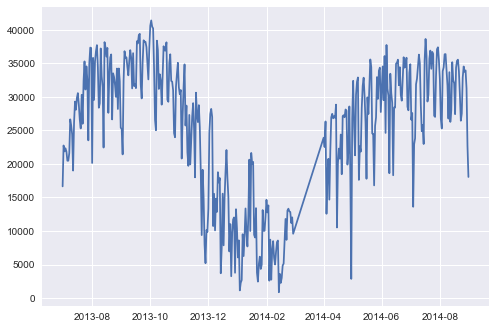

In [8]:
#number of trips per date
plt.plot(allTrips_df.groupby(allTrips_df['starttime'].dt.date).starttime.count())
plt.show()

In [9]:
# average, standard deviation, etc
allTrips_df.groupby(allTrips_df['starttime'].dt.date).starttime.count().describe()

count      396.000000
mean     25172.800505
std      10207.009656
min        876.000000
25%      18574.250000
50%      27478.000000
75%      33452.000000
max      41383.000000
Name: starttime, dtype: float64

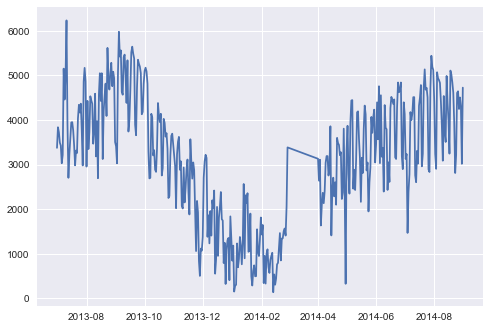

In [10]:
#number of rebalancings per per date
plt.plot(rebalancing_df.groupby(rebalancing_df['starttime'].dt.date).starttime.count())
plt.show()

In [11]:
# average, standard deviation, etc
rebalancing_df.groupby(rebalancing_df['starttime'].dt.date).starttime.count().describe()

count     396.000000
mean     3150.487374
std      1408.148039
min       137.000000
25%      2160.750000
50%      3217.000000
75%      4335.500000
max      6233.000000
Name: starttime, dtype: float64

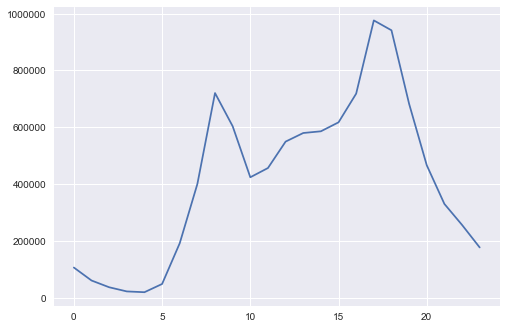

In [12]:
#number of trips per starting hour
plt.plot(allTrips_df.groupby(allTrips_df['starttime'].dt.hour).starttime.count())
plt.show()

In [13]:
len(allTrips_df)

9968429

In [14]:
len(allTrips_df['end station name'].unique())

340

In [26]:
#take the trips from a single bike
allTripsOneBike = allTrips_df[allTrips_df['bikeid'] == 14529].copy()

In [27]:
allTripsOneBike.sort_values('starttime', inplace=True)

In [17]:
allTripsOneBike = allTripsOneBike.reset_index()

In [18]:
allTripsOneBike

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start next station id
0,15139,1562,2013-07-01 21:28:12,2013-07-01 21:54:14,388,W 26 St & 10 Ave,40.749718,-74.002950,375,Mercer St & Bleecker St,40.726795,-73.996951,14529,Subscriber,1943,1,375.0
1,21956,621,2013-07-02 09:49:10,2013-07-02 09:59:31,375,Mercer St & Bleecker St,40.726795,-73.996951,330,Reade St & Broadway,40.714505,-74.005628,14529,Subscriber,1960,1,330.0
2,23877,1055,2013-07-02 11:55:56,2013-07-02 12:13:31,330,Reade St & Broadway,40.714505,-74.005628,294,Washington Square E,40.730494,-73.995721,14529,Customer,\N,0,294.0
3,30610,494,2013-07-02 17:24:40,2013-07-02 17:32:54,294,Washington Square E,40.730494,-73.995721,127,Barrow St & Hudson St,40.731724,-74.006744,14529,Subscriber,1979,1,127.0
4,31217,649,2013-07-02 17:37:30,2013-07-02 17:48:19,127,Barrow St & Hudson St,40.731724,-74.006744,253,W 13 St & 5 Ave,40.735439,-73.994539,14529,Subscriber,1976,1,253.0
5,32096,689,2013-07-02 17:56:08,2013-07-02 18:07:37,253,W 13 St & 5 Ave,40.735439,-73.994539,317,E 6 St & Avenue B,40.724537,-73.981854,14529,Subscriber,1975,2,317.0
6,39223,961,2013-07-02 23:32:16,2013-07-02 23:48:17,317,E 6 St & Avenue B,40.724537,-73.981854,336,Sullivan St & Washington Sq,40.730477,-73.999061,14529,Subscriber,1972,2,336.0
7,39821,655,2013-07-03 02:54:40,2013-07-03 03:05:35,336,Sullivan St & Washington Sq,40.730477,-73.999061,538,W 49 St & 5 Ave,40.757952,-73.977876,14529,Subscriber,1981,1,538.0
8,42675,1008,2013-07-03 08:36:55,2013-07-03 08:53:43,538,W 49 St & 5 Ave,40.757952,-73.977876,387,Centre St & Chambers St,40.712733,-74.004607,14529,Subscriber,1988,1,387.0
9,43759,266,2013-07-03 09:07:09,2013-07-03 09:11:35,387,Centre St & Chambers St,40.712733,-74.004607,276,Duane St & Greenwich St,40.717488,-74.010455,14529,Subscriber,1978,1,276.0


In [19]:
#SCRAP
#sg_map = folium.Map(location=[40.749718, -74.002950], zoom_start=13)
#folium.CircleMarker(location=[40.749718, -74.002950], fill_color='red', radius=5, weight=0).add_to(sg_map)
#sg_map
#sg_map.save('C://Users//Bryan//Documents//GitHub//Springboard//Capstone Project//Image Pipe//a.html')
#sg_map.save('Image Pipe//1.html')

In [20]:
#SCRAP
#sg_map = folium.Map(location=[40.749718, -74.002950], zoom_start=13)
#folium.CircleMarker(location=[40.726795, -73.996951], fill_color='red', radius=5, weight=0).add_to(sg_map)
#sg_map
#sg_map.save('Image Pipe//2.html')
#allTripsOneBike.loc[0,'start station latitude']

In [21]:
#plot starting locations for a given bike on N different maps
#for i in range(len(allTripsOneBike)):
for i in range(1000):
    sg_map = folium.Map(location=[40.749718, -74.002950], zoom_start=13)
    folium.CircleMarker(location=[allTripsOneBike.loc[i,'start station latitude'], allTripsOneBike.loc[i,'start station longitude']], fill_color='red', radius=5, weight=0).add_to(sg_map)
    sg_map.save('Image Pipe//' + str(i) + '.html')

In [22]:
#function for plotting many points onto a single map... to use later!
#def plotDot(point):
#    '''input: series that contains a numeric named latitude and a numeric named longitude
#    this function creates a CircleMarker and adds it to your this_map'''
#    folium.CircleMarker(location=[point['start station latitude'], point['start station longitude']],
#                        radius=2,
#                        weight=0).add_to(sg_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
#allTrips14529.apply(plotDot, axis = 1)

In [23]:
# -------------------------------------------------------------
# -------------------------------------------------------------
# -------------------------------------------------------------
# -------------------------------------------------------------

In [24]:
#run program from the command line to convert html to png files
cmdstringPhantom = (["phantomjs.exe", "convertToPNG-auto.js"])
myCWD = "C://Users//Bryan//Documents//GitHub//Springboard//Capstone Project//Image Pipe"

for i in range(1000):    
    javaScriptCode = """var page = require('webpage').create();
    //viewportSize being the actual size of the headless browser
    page.viewportSize = { width: 1024, height: 768 };
    //the clipRect is the portion of the page you are taking a screenshot of
    page.clipRect = { top: 0, left: 0, width: 1024, height: 768 };
    //the rest of the code is the same as the previous example
    page.open('""" + str(i) + """.html', function() {
      page.render('""" + str(i) + """.png');
      phantom.exit();
    });\n"""
    
    target = open('Image Pipe//convertToPNG-auto.js', 'w')
    target.write(javaScriptCode)
    target.close()
    subprocess.check_call(cmdstringPhantom, stdin=subprocess.PIPE, cwd=myCWD)

In [25]:
#run program from the command convert png files into an animation
# ffmpeg -f image2 -i %d.png -r 2 mybike.avi
cmdstringFFMPEG = (["FFMPEG.exe", "-f", "image2", "-i", "%d.png", "-r", "2", "mybike.avi"])
subprocess.check_call(cmdstringFFMPEG, stdin=subprocess.PIPE, cwd=myCWD)